<h1>Data Science Capstone</h1>

Maxwell Burner

<p>This notebook will be used for my capstone project for the Coursera Data Science certificate Series.</p>

In [1]:
import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim

import requests

import pydotplus

from IPython.display import Image

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.image as mpimg
from matplotlib import pyplot as py
%matplotlib inline

import sklearn.tree as tree

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report


import folium

# I. Create Database

## A. Create Database of Chicago Neighborhoods with Coordinates

In [1]:
Albany_Park = ['Albany Park','Mayfair','North Mayfair','Ravenswood Manor']
Archer_Heights = ['Archer Heights']
Armour_Square = ['Armour Square','Chinatown','Wentworth Gardens']
Ashburn = ['Ashburn','Beverly View','Parkview','Scottsdale','Wrightwood']
Auburn_Gresham = ['Gresham']
Austin = ['Galewood','The Island','North Austin','South Austin','West Humboldt Park']
Avalon_Park = ['Avalon Park','Marynook','Stony Island Park']
Avondale = ['Avondale','Polish Village']
Belmont_Cragin = ['Belmont Central','Brickyard','Cragin','Hanson Park']
Beverly  = ['Beverly','East Beverly','West Beverly']
Bridgeport = ['Bridgeport']
Brighton_Park = ['Brighton Park']
Burnside = ['Burnside']
Calumet_Heights = ['Calumet Heights','Pill Hill']
Chatham = ['Chatham','East Chatham','West Chatham']
Chicago_Lawn = ['Chicago Lawn','Lithuanian Plaza','Marquette Park']
Clearing = ['Chrysler Village','Clearing East','Clearing West']
Douglas = ['Bronzeville','Dearborn Homes','The Gap','Groveland Park','Lake Meadows','Prairie Shores','South Commons',
          'Stateway Gardens']
Dunning = ['Dunning','Irving Woods','Schorsch Village']
East_Garfield_Park = ['East Garfield Park','Fifth City']
East_Side = ['East Side']
Edgewater = ['Andersonville','Edgewater','Edgewater Beach','Edgewater Glen','Lakewood']
Edison_Park = ['Edison Park']
Englewood = ['Englewood', 'Hamilton Park']
Forest_Glen = ['Edgebrook','Forest Glen','Old Edgebrook','Sauganash','South Edgebrook','Wildwood']
Fuller_Park = ['Fuller Park']
Gage_Park = ['Gage Park']
Garfield_Ridge = ['Garfield Ridge','LeClaire Courts','Sleepy Hollow','Vittum Park']
Grand_Boulevard = ['Grand Boulevard','Legends South']
Greater_Grand_Crossing = ['Grand Crossing','Greater Grand Crossing','Park Manor']
Hegewisch = ['Hegewisch']
Hermosa = ['Belmont Gardens','Hermosa','Kelvyn Park']
Humboldt_Park = ['Humboldt Park']
Hyde_Park = ['East Hyde Park','Hyde Park']
Irving_Park = ['Avondale Gardens','Irving Park','Kilbourn Park','Merchant Park','Old Irving Park','The Villa']
Jefferson_Park = ['Gladstone Park','Jefferson Park']
Kenwood = ['Kenwood', 'North Kenwood']
Lake_View = ['Boystown','Graceland West','Lake View','Lake View East','North Halsted','South East Ravenswood',
            'West Lakeview','Wrigleyville']
Lincoln_Park = ['Lincoln Park','Park West','Range Triangle','Sheffield Neighbors','West DePaul',
               'Wrightwood Neighbors']
Lincoln_Square = ['Bowmanville','Budlong Woods','Lincoln Square','Ravenswood','Ravenswood Gardens']
Logan_Square = ['Bucktown', 'Kosciuszko Park','Logan Square','Palmer Square']
Lower_West_Side = ['East Pilsen','Heart of Chicago','Lower West Side','Pilsen']
McKinley_Park = ['McKinley Park']
Montclare = ['Montclare']
Morgan_Park = ['Beverly Woods','Morgan Park','Kennedy Park','West Morgan Park']
Mount_Greenwood = ['Mount Greenwood','Talley\'s Corner']
Near_North_Side = ['Cabrini-Green','Gold Coast','Goose Island','Magnificent Mile','Near North Side','Old Town',
                  'River North','Streeterville']
Near_South_Side = ['Central Station','Dearborn Park','Museum Campus','Prairie Avenue Historic District']
Near_West_Side = ['Fulton River District','Greektown','Illinois Medical District','Little Italy','Near West Side',
                 'Tri-Taylor','University Village','West Loop']
New_City = ['Back of the Yards','Canaryville','New City']
North_Center = ['North Center', 'Roscoe Village', 'Saint Ben\'s']
North_Lawndale = ['Douglas Park', 'Homan Square','K-Town','North Lawndale']
North_Park = ['Hollywood Park','North Park','River\'s Edge',]
Norwood_Park = ['Big Oaks','Norwood Park East','Norwood Park West','Old Norwood','Oriole Park','Union Ridge']
O_Hare = ['O\'Hare','Schorsch Forest View']
Oakland = ['Oakland']
Portage_Park = ['Portage Park']
Pullman = ['Cottage Grove Heights','Pullman']
Riverdale = ['Altgeld Gardens','Eden Green','Golden Gate','Riverdale']
Rogers_Park = ['Loyola','Rogers Park']
Roseland = ['Fernwood','Kensington','Lilydale','Princeton Park','Roseland','Rosemoor']
South_Chicago = ['South Chicago']
South_Deering = ['South Deering']
South_Lawndale = ['Little Village','Marhsall Square','South Lawndale']
South_Shore = ['Jackson Park Highlands','South Shore']
The_Loop = ['The Loop','New Eastside','Printer\'s Row','South Loop']
Uptown = ['Buena Park','Clarendon Park','Margate Park','New Chinatown','Sheridan Park','Uptown']
Washington_Heights = ['Brainerd','Longwood Manor','Washington Heights']
Washington_Park = ['Washington Park']
West_Elsdon = ['West Elsdon']
West_Englewood = ['West Englewood']
West_Garfield_Park = ['West Garfield Park']
West_Lawn =['Ford City', 'West Lawn']
West_Pullman = ['West Pullman']
West_Ridge = ['Nortown','Peterson Park','Rosehill','West Ridge','West Rogers Park']
West_Town = ['East Village',' Noble Square', 'Pulaski Park','River West','Smith Park','Ukrainian Village', 'West Town',
            'Wicker Park','Polish Triangle']
Woodlawn = ['Woodlawn','West Woodlawn']
community_areas = {'Albany Park':Albany_Park,'Archer Heights':Archer_Heights,'Armour Square':Armour_Square,'Ashburn':Ashburn,
                   'Auburn Gresham':Auburn_Gresham,'Austin':Austin,'Avalon Park':Avalon_Park,
                  'Avondale':Avondale,'Belmont Cragin':Belmont_Cragin,'Beverly':Beverly,'Bridgeport':Bridgeport,
                   'Brighton Park':Brighton_Park,'Burnside':Burnside,'Calumet Heights':Calumet_Heights,
                  'Chatham':Chatham,'Chicago Lawn':Chicago_Lawn,'Clearing':Clearing,'Douglas':Douglas,'Dunning':Dunning,
                   'East Garfield Park':East_Garfield_Park,'East Side':East_Side,'Edgewater':Edgewater,
                   'Edison Park':Edison_Park,'Englewood':Englewood,'Forest Glen':Forest_Glen,'Fuller Park':Fuller_Park,
                   'Gage Park':Gage_Park,'Garfield Ridge':Garfield_Ridge,'Grand Boulevard':Grand_Boulevard,
                  'Greater Grand Crossing':Greater_Grand_Crossing, 'Hegewisch':Hegewisch,'Hermosa':Hermosa,
                   'Humboldt Park':Humboldt_Park,'Irving Park':Irving_Park,'Jefferson Park':Jefferson_Park,
                  'Kenwood':Kenwood,'Lake View':Lake_View,'Lincoln Park':Lincoln_Park,'Lincoln Square':Lincoln_Square,
                   'Logan Square':Logan_Square,'Lower West Side':Lower_West_Side,'McKinley Park':McKinley_Park,
                  'Montclare':Montclare,'Morgan Park':Morgan_Park,'Mount Greenwood':Mount_Greenwood,
                   'Near North Side':Near_North_Side,'Near South Side':Near_South_Side,'Near West Side':Near_West_Side,
                  'New City':New_City,'North Center':North_Center,'North Lawndale':North_Lawndale,'North Park':North_Park,
                   'Norwood Park':Norwood_Park,'O\'Hare':O_Hare,'Oakland':Oakland,
                  'Portage Park':Portage_Park,'Pullman':Pullman,'Riverdale':Riverdale,'Rogers Park':Rogers_Park,
                   'Roseland':Roseland,'South Chicago':South_Chicago,'South Deering':South_Deering,
                  'South Lawndale':South_Lawndale,'South Shore':South_Shore,'The Loop':The_Loop,'Uptown':Uptown,
                   'Washington Heights':Washington_Heights,'Washington Park':Washington_Park,
                  'West Elsdon':West_Elsdon,'West Englewood':West_Englewood,'West Garfield Park':West_Garfield_Park,
                   'West Lawn':West_Lawn,'West Pullman':West_Pullman,'West Ridge':West_Ridge,
                  'West Town':West_Town,'Woodlawn':Woodlawn}

In [4]:
myGeo = Nominatim(user_agent = 'maxwell_burner')

In [5]:
def build_chicago_df(name, neighborhoods):
    outlist = []
    coordTupSet = set()
    for neighborhood in neighborhoods:
        success = False
        attempts = 0
        while(success == False):
            try:
                address = neighborhood+', Chicago, Illinois'
                loc = myGeo.geocode(address)
                coordTup = (loc.latitude,loc.longitude)
                if(not(coordTup in coordTupSet)):
                    coordTupSet.add(coordTup)
                    row = {
                        'District':name,
                        'Neighborhood':neighborhood,
                        'Latitude':loc.latitude,
                        'Longitude':loc.longitude
                          }
                    outlist.append(row)
                    success = True
            except:
                if(attempts > 20):
                    print('Unable to get coordinates for '+neighborhood)
                    success = True
                else:
                    attempts = attempts + 1
    if(len(outlist) > 0):
        return outlist
    else:
        print('Could not get neighborhoods for'+name)
        return 0

In [6]:
chicago_df = pd.DataFrame(columns = ['District','Neighborhood','Latitude','Longitude'])
for key in list(community_areas.keys()):
    get = build_chicago_df(key, community_areas[key])
    if(get != 0):
        print('Got '+key)
        chicago_df = chicago_df.append(get, ignore_index = True)


Got Albany Park
Got Archer Heights
Got Armour Square
Unable to get coordinates for Ashburn Estates
Unable to get coordinates for Crestline
Got Ashburn
Got Auburn Gresham
Got Austin
Got Avalon Park
Got Avondale
Got Belmont Cragin
Got Beverly
Got Bridgeport
Got Brighton Park
Got Burnside
Got Calumet Heights
Got Chatham
Got Chicago Lawn
Got Clearing
Got Douglas
Unable to get coordinates for Irving Woods
Got Dunning
Got East Garfield Park
Got East Side
Got Edgewater
Got Edison Park
Got Englewood
Got Forest Glen
Got Fuller Park
Got Gage Park
Got Garfield Ridge
Got Grand Boulevard
Got Greater Grand Crossing
Got Hegewisch
Got Hermosa
Got Humboldt Park
Got Irving Park
Got Jefferson Park
Got Kenwood
Unable to get coordinates for Lake View East
Unable to get coordinates for Sheridan Station Corridor
Got Lake View
Unable to get coordinates for Old Town Triangle
Unable to get coordinates for Sheffield Neighbors
Unable to get coordinates for Wrightwood Neighbors
Got Lincoln Park
Unable to get coord

## B. Create Database of Chicago Venues

In [13]:
CLIENT_ID = 'Q4RKQ5QDH2EJLHQB0X1HH5YGWP02VKIM3Y0GFIPLWTXQ1VIA'
CLIENT_SECRET = 'P4ORBZGRWND3H0FE4Z4URXSMOBTFCXQ1ICGE5HK02U4PEZ0J'
VERSION = '20190420'


#Function to get venues for each Seattle neighborhood
def get_venues(districts, neighborhoods, latitudes, longitudes):
    venue_df = pd.DataFrame(columns = ['Name','Venue_Category',
                                       'Neighborhood','District','Latitude','Longitude'])
    venue_dl = []
    id_set = set()
    
    for district, neighborhood, latitude, longitude in zip(districts, neighborhoods, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            latitude,
            longitude,
            5000,
            20000
        )
        results = requests.get(url).json()
        
        try:
            results = results['response']['groups'][0]['items']
            for v in results:
                venue_id = v['venue']['id']
                if(not(venue_id in id_set)):
                    try:
                        venue = {
                            'Name':v['venue']['name'],
                            'Venue_Category':v['venue']['categories'][0]['name'],
                            'Neighborhood':neighborhood,
                            'District':district,
                            'Latitude':v['venue']['location']['lat'],
                            'Longitude':v['venue']['location']['lng']
                        }
                        id_set.add(venue_id)
                        venue_dl.append(venue)
                    except Exception as e:
                        print('Problem getting venue from '+neighborhood+', '+district)
                        print(e)
        except Exception as e:
            print('Error: Problem with '+neighborhood+', '+district)
            print(e)
            
            
    venue_df = venue_df.append(venue_dl, ignore_index = True)
    return venue_df

In [16]:
#Create and preview venue dataframe
v_df = get_venues(chicago_df['District'],chicago_df['Neighborhood'],chicago_df['Latitude'],chicago_df['Longitude'])
v_df.head()

,Name,Venue_Category,Neighborhood,District,Latitude,Longitude
0,Tre Kronor,Scandinavian Restaurant,Albany Park,Albany Park,41.975842,-87.711037
1,Noon O Kabab,Middle Eastern Restaurant,Albany Park,Albany Park,41.966700,-87.708332
2,2 Asian Brothers,Vietnamese Restaurant,Albany Park,Albany Park,41.975832,-87.709655
3,Great Sea Chinese Restaurant,Chinese Restaurant,Albany Park,Albany Park,41.968496,-87.710678
4,Lawrence Fish Market,Seafood Restaurant,Albany Park,Albany Park,41.968280,-87.726250


## C. Create a Database of Chicago Neighborhoods with Number of Each Venue Category

In [117]:
venue_categories = list(set(v_df['Venue_Category']))
venueCount_df = pd.DataFrame(columns = ['Neighborhood_'] + venue_categories)

venueCount_dl = []

for neighborhood in chicago_df.index:
    vCount_dict = {'Neighborhood_':neighborhood}
    for category in venue_categories:
        vCount = sum(v_df.loc[(v_df['Neighborhood']==neighborhood),:]['Venue_Category']==category)
        vCount_dict.update({category: vCount})
    venueCount_dl.append(vCount_dict)

venueCount_df = venueCount_df.append(venueCount_dl)
venueCount_df = venueCount_df.set_index('Neighborhood_')
venueCount_df.index.name = 'Neighborhood'
venueCount_df = venueCount_df.astype(int)
venueCount_df.head()

,Soccer Field,Pie Shop,Hookah Bar,German Restaurant,Latin American Restaurant,Diner,Cosmetics Shop,Café,Eastern European Restaurant,ATM,...,Warehouse,Middle Eastern Restaurant,New American Restaurant,Organic Grocery,Outdoors & Recreation,Dog Run,Filipino Restaurant,Restaurant,Fast Food Restaurant,Arts & Entertainment
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Albany Park,1,0,0,1,0,0,0,1,0,0,...,0,2,2,0,0,0,1,1,0,0
Mayfair,0,1,1,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
Ravenswood Manor,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
Archer Heights,0,0,0,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,1,0
Armour Square,0,0,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [13]:
pd.value_counts(IR_Bool)

0    194
1     13
Name: Italian Restaurant, dtype: int64

In [121]:
#Extra for working on program: Create/retrieve csv
v_df.to_csv(r'C:\Users\Maxwell Burner\Desktop\Data_Science\Lecture Notes\chicago_venues_df.csv')
chicago_df.to_csv(r'C:\Users\Maxwell Burner\Desktop\Data_Science\Lecture Notes\chicago_df.csv')
venueCount_df.to_csv(r'C:\Users\Maxwell Burner\Desktop\Data_Science\Lecture Notes\venueCount_df.csv')

In [2]:
#Bypass: Copy Dataframes from Github raws
v_df = pd.read_csv(r'https://raw.githubusercontent.com/burnermax37/Coursera_Capstone/master/chicago_venues_df.csv').iloc[:,1:]
chicago_df = pd.read_csv(r'https://raw.githubusercontent.com/burnermax37/Coursera_Capstone/master/chicago_df.csv')
venueCount_df = pd.read_csv(r'https://raw.githubusercontent.com/burnermax37/Coursera_Capstone/master/venueCount_df.csv')

chicago_df = chicago_df.set_index('Neighborhood', drop = True)
venueCount_df = venueCount_df.set_index('Neighborhood', drop = True)

In [3]:
venueCount_df.head(20)

,Soccer Field,Pie Shop,Hookah Bar,German Restaurant,Latin American Restaurant,Diner,Cosmetics Shop,Café,Eastern European Restaurant,ATM,...,Warehouse,Middle Eastern Restaurant,New American Restaurant,Organic Grocery,Outdoors & Recreation,Dog Run,Filipino Restaurant,Restaurant,Fast Food Restaurant,Arts & Entertainment
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Albany Park,1,0,0,1,0,0,0,1,0,0,...,0,2,2,0,0,0,1,1,0,0
Mayfair,0,1,1,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
Ravenswood Manor,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
Archer Heights,0,0,0,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,1,1,0
Armour Square,0,0,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
Chinatown,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Wentworth Gardens,1,0,0,0,0,0,1,2,0,0,...,0,0,1,0,0,0,0,1,0,0
Ashburn,0,0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,3,0
Beverly View,0,0,0,0,0,0,2,1,0,1,...,0,1,0,0,0,0,0,0,1,0


# II. Predict Location Suitability with Classification

## A. Transform Variables

The base target value is numeric, a count of how many Italian Restaurants are present in a neighborhood. However, this variable is discrete rather than continuous, and therefore probably be predicted using classification methods rather than regression. To facilitate this, and make the implication clear, the attribute containing number of italian restaurants is mapped to a new categorical variable according to the following legend:

0 Italian restaurants: Very Poor

1 Italian restaurant: Poor

2 Italian restaurant: Okay

3 Italian restaurants: Good

4 Italian restaurants: Very Good

5 Italian restaurants: Excellent

6 Italian restaurants: Perfect

Alternately, a Boolean approach can be used, with 1 indicating a neighborhood with more than one Italian restaurants, and 0 indicating an neighborhood with zero or one Italian Restaurants.

In [18]:
#Assign ratings to neighborhoods based on number of Italian restaurants
IR_Ratings = venueCount_df['Italian Restaurant']
IR_Ratings = IR_Ratings.replace({0:'Very Poor', 1:'Poor', 2:'Okay', 3:'Good', 4:'Very Good', 5:'Excellent', 6:'Perfect'})

pd.value_counts(IR_Ratings).loc[['Very Poor', 'Poor', 'Okay', 'Good', 'Very Good', 'Excellent', 'Perfect']]


Very Poor    167
Poor          27
Okay           7
Good           2
Very Good      2
Excellent      1
Perfect        1
Name: Italian Restaurant, dtype: int64

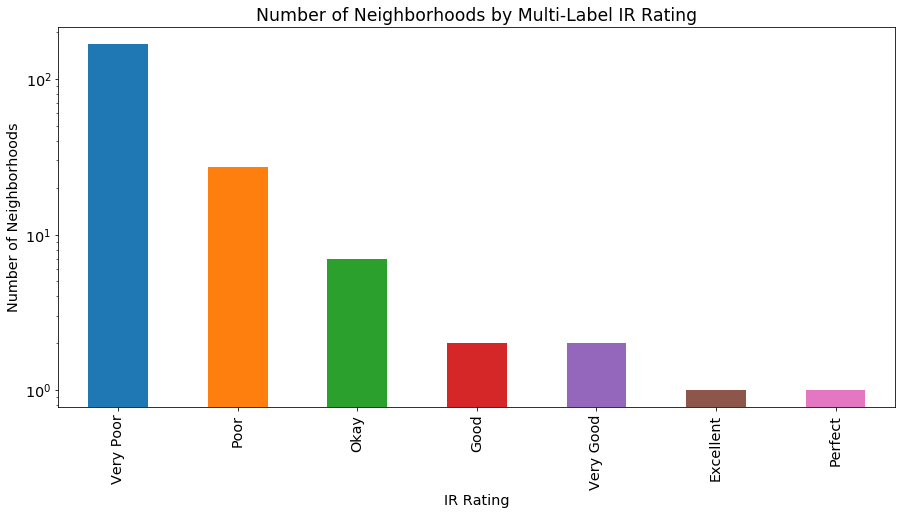

In [5]:
order = ['Very Poor','Poor','Okay','Good','Very Good','Excellent','Perfect']
fig = py.figure(figsize = (15,7))
ax = pd.value_counts(IR_Ratings).loc[order].plot(kind = 'bar')
ax.set_title('Number of Neighborhoods by Multi-Label IR Rating', fontsize = 'xx-large')
ax.set_xlabel('IR Rating', fontsize = 'x-large')
ax.set_ylabel('Number of Neighborhoods', fontsize = 'x-large')
py.xticks(fontsize = 'x-large')
py.yticks(fontsize = 'x-large')
ax.set_yscale('log')

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

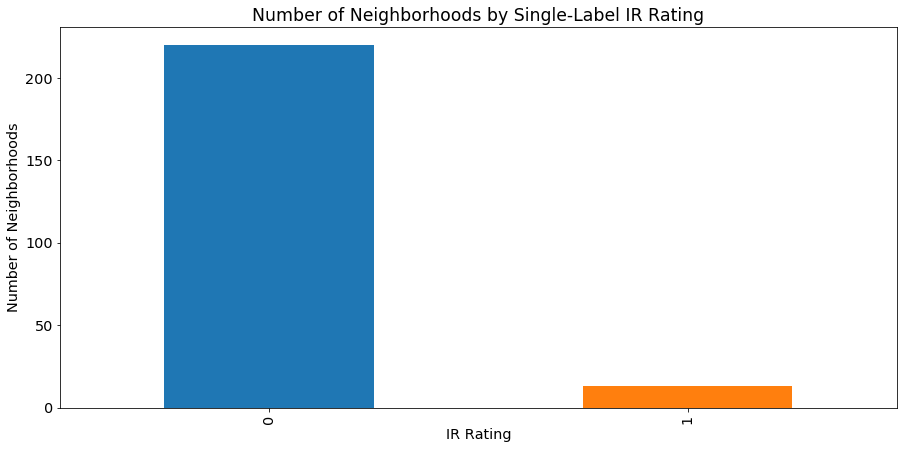

In [91]:

fig = py.figure(figsize = (15,7))
ax = pd.value_counts(IR_Bool).plot(kind = 'bar')
ax.set_title('Number of Neighborhoods by Single-Label IR Rating', fontsize = 'xx-large')
ax.set_xlabel('IR Rating', fontsize = 'x-large')
ax.set_ylabel('Number of Neighborhoods', fontsize = 'x-large')
py.xticks(fontsize = 'x-large')
py.yticks(fontsize = 'x-large')


In [4]:
IR_Bool = venueCount_df['Italian Restaurant']
IR_Bool = IR_Bool.replace({1:0,2:1,3:1,4:1,5:1,6:1})


In [5]:
Xraw = venueCount_df.drop('Italian Restaurant', axis=1).values
ss = StandardScaler()
X = ss.fit_transform(Xraw)

C:\Users\Maxwell Burner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Maxwell Burner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## A. K-Nearest Neighbors Classification

In [12]:
#KNeighbors Validation of K-Value
KN_val_df = pd.DataFrame(columns = ['K Value', 'Accuracy Score Median','Accuracy Score Mean', 'Accuracy Score StdDev',
                                   'Accuracy Score Skew'])
KN_val_dl = []


for k in range(1,20):

    accuracy_list = []
    testK = KNeighborsClassifier(n_neighbors = k)
    for r in range(200):
        X_train, X_test, y_train, y_test = train_test_split(X, IR_Ratings, test_size = 0.3, random_state = r)
        testK.fit(X_train, y_train)
        y_hat = testK.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, y_hat))
    kMean = round(np.mean(accuracy_list),2)
    kMedian = round(np.median(accuracy_list),2)
    kStdDev = round(np.std(accuracy_list, ddof = 19),2)
    kSkew = round( ((kMedian - kMean)*3/kStdDev),2  )
    KN_val_dl.append({'K Value':k,'Accuracy Score Median':kMedian, 'Accuracy Score Mean':kMean,
                      'Accuracy Score StdDev':kStdDev,
                      'Accuracy Score Skew':kSkew
                     })
        

KN_val_df = KN_val_df.append(KN_val_dl, ignore_index = True)
KN_val_df = KN_val_df.set_index('K Value')
KN_val_df

,Accuracy Score Median,Accuracy Score Mean,Accuracy Score StdDev,Accuracy Score Skew
K Value,,,,
1,0.76,0.77,0.05,-0.6
2,0.76,0.76,0.05,0.0
3,0.81,0.81,0.05,0.0
4,0.81,0.81,0.05,0.0
5,0.81,0.81,0.05,0.0
6,0.81,0.81,0.05,0.0
7,0.81,0.81,0.05,0.0
8,0.81,0.81,0.05,0.0
9,0.81,0.81,0.05,0.0


<ErrorbarContainer object of 3 artists>

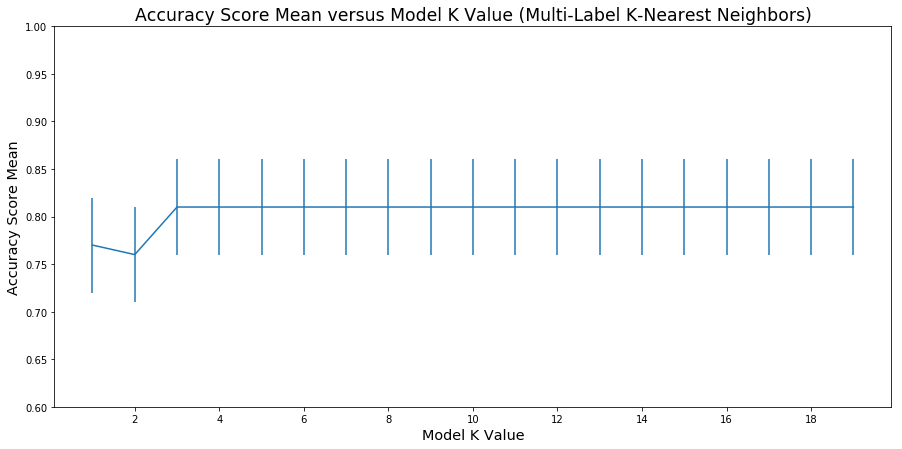

In [14]:
fig = py.figure(figsize = (15,7))
pl = py.errorbar(KN_val_df.index.tolist(),KN_val_df['Accuracy Score Mean'], yerr = KN_val_df['Accuracy Score StdDev'],
           )
py.ylim(0.6,1)
py.xlabel('Model K Value', fontsize = 'x-large')
py.ylabel('Accuracy Score Mean', fontsize = 'x-large')
py.title('Accuracy Score Mean versus Model K Value (Multi-Label K-Nearest Neighbors)', fontsize = 'xx-large')
py.xticks([2,4,6,8,10,12,14,16,18])
pl

Mean accuracy score was 0.78 (for k =< 2) or 0.83 (for k > 2). Accuracy score standard deviation was constant at 0.04 when calculated over 200 attempts at creating a model.

In [131]:
myK = KNeighborsClassifier(n_neighbors = 3)
myK.fit(X, IR_Ratings)
y_hat = myK.predict(X)
accuracy_score(IR_Ratings, y_hat)

0.855072463768116

In [61]:
#KNeighbors Validation of K-Value, Single-Label
KN_bool_df = pd.DataFrame(columns = ['K Value', 'Accuracy Score Median','Accuracy Score Mean', 'Accuracy Score StdDev',
                                   'Accuracy Score Skew'])
KN_bool_dl = []


for k in range(1,20):

    accuracy_list = []
    testK = KNeighborsClassifier(n_neighbors = k)
    for r in range(200):
        X_train, X_test, y_train, y_test = train_test_split(X, IR_Bool, test_size = 0.3, random_state = r)
        testK.fit(X_train, y_train)
        y_hat = testK.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, y_hat))
    kMean = round(np.mean(accuracy_list),2)
    kMedian = round(np.median(accuracy_list),2)
    kStdDev = round(np.std(accuracy_list, ddof = 19),2)
    kSkew = round( ((kMedian - kMean)*3/kStdDev),2  )
    KN_bool_dl.append({'K Value':k,'Accuracy Score Median':kMedian, 'Accuracy Score Mean':kMean,
                      'Accuracy Score StdDev':kStdDev,
                      'Accuracy Score Skew':kSkew
                     })
        

KN_bool_df = KN_bool_df.append(KN_val_dl, ignore_index = True)
KN_bool_df = KN_bool_df.set_index('K Value')
KN_bool_df

,Accuracy Score Median,Accuracy Score Mean,Accuracy Score StdDev,Accuracy Score Skew
K Value,,,,
1,0.76,0.77,0.05,-0.6
2,0.76,0.76,0.05,0.0
3,0.81,0.81,0.05,0.0
4,0.81,0.81,0.05,0.0
5,0.81,0.81,0.05,0.0
6,0.81,0.81,0.05,0.0
7,0.81,0.81,0.05,0.0
8,0.81,0.81,0.05,0.0
9,0.81,0.81,0.05,0.0


<ErrorbarContainer object of 3 artists>

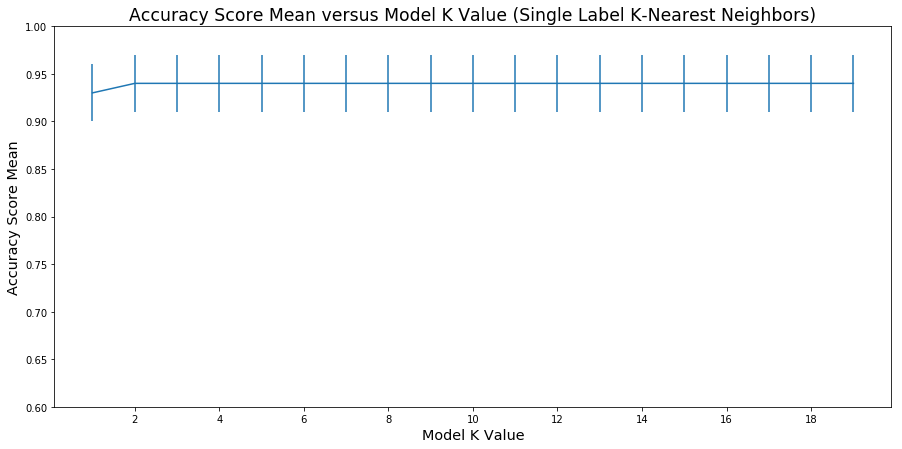

In [13]:
fig = py.figure(figsize = (15,7))
pl = py.errorbar(KN_bool_df.index.tolist(),KN_bool_df['Accuracy Score Mean'], yerr = KN_bool_df['Accuracy Score StdDev'],
           )
py.ylim(0.6,1)
py.xlabel('Model K Value', fontsize = 'x-large')
py.ylabel('Accuracy Score Mean', fontsize = 'x-large')
py.title('Accuracy Score Mean versus Model K Value (Single Label K-Nearest Neighbors)', fontsize = 'xx-large')
py.xticks([2,4,6,8,10,12,14,16,18])
pl

In [16]:
myK = KNeighborsClassifier(n_neighbors = 2)
myK.fit(X, IR_Bool)
y_hat = myK.predict(X)
accuracy_score(IR_Bool, y_hat)

0.9371980676328503

## B. Decision Tree Classification

In [142]:
#Decision Tree Validation of Tree Depth, Multi-Label Approach
treeVal_df = pd.DataFrame(columns = ['Maximum Depth','Accuracy Score Median', 'Accuracy Score Mean',
                                     'Accuracy Score StdDev', 'Accuracy Score Skew'])
treeVal_dl = []

for k in range(1,20):
    accuracy_list = []
    testTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = k)
    for r in range(200):
        X_train, X_test, y_train, y_test = train_test_split(X, IR_Ratings, test_size = 0.3, random_state = r)
        testTree.fit(X_train, y_train)
        y_hat = testTree.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, y_hat))
    kMean = round(np.mean(accuracy_list),2)
    kMedian = round(np.median(accuracy_list),2)
    kStdDev = round(np.std(accuracy_list, ddof = 19),2)
    kSkew = round(((kMedian - kMean)*3/kStdDev),2)
    treeVal_dl.append({'Maximum Depth':k,
                       'Accuracy Score Median':kMedian,
                       'Accuracy Score Mean':kMean, 
                       'Accuracy Score StdDev':kStdDev,
                      'Accuracy Score Skew':kSkew})


treeVal_df = treeVal_df.append(treeVal_dl, ignore_index = True)
treeVal_df = treeVal_df.set_index('Maximum Depth')
treeVal_df

,Accuracy Score Median,Accuracy Score Mean,Accuracy Score StdDev,Accuracy Score Skew
Maximum Depth,,,,
1,0.79,0.79,0.05,0.0
2,0.78,0.78,0.05,0.0
3,0.78,0.77,0.06,0.5
4,0.76,0.76,0.06,0.0
5,0.76,0.76,0.05,0.0
6,0.76,0.75,0.05,0.6
7,0.75,0.75,0.05,0.0
8,0.75,0.75,0.05,0.0
9,0.75,0.75,0.05,0.0


Text(0.5, 1.0, 'Accuracy Score Mean versus Maximum Tree Depth (Multi-Label Decision Tree Classifier)')

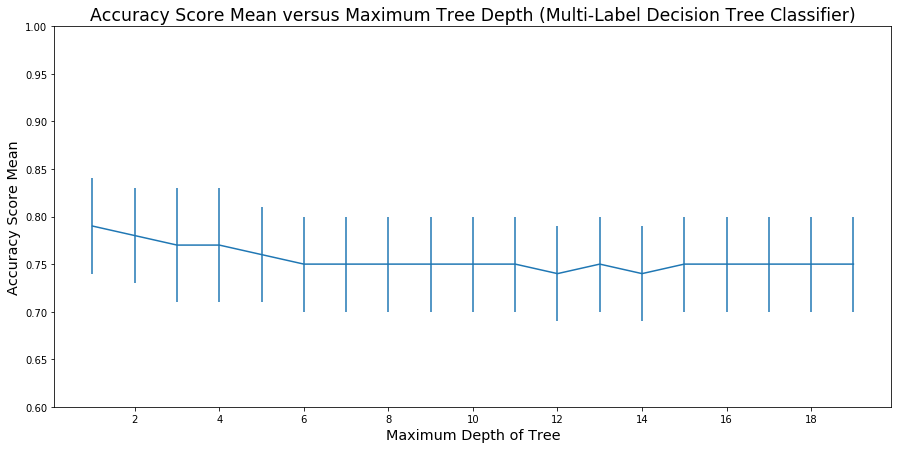

In [133]:
py.figure(figsize = (15,7))
py.errorbar(treeVal_df.index.tolist(),treeVal_df['Accuracy Score Mean'],yerr = treeVal_df['Accuracy Score StdDev'])
py.xlabel('Maximum Depth of Tree', fontsize = 'x-large')
py.ylabel('Accuracy Score Mean', fontsize = 'x-large')
py.ylim(0.6,1)
py.xticks([2,4,6,8,10,12,14,16,18])
py.title('Accuracy Score Mean versus Maximum Tree Depth (Multi-Label Decision Tree Classifier)'\
        , fontsize = 'xx-large')

In [143]:
#Decision Tree Validation of Tree Depth, Boolean Approach
treeBool_df = pd.DataFrame(columns = ['Maximum Depth','Accuracy Score Median', 'Accuracy Score Mean',
                                     'Accuracy Score StdDev', 'Accuracy Score Skew'])

treeBool_dl = []

for k in range(1,20):
    accuracy_list = []
    testTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = k)
    for r in range(200):
        X_train, X_test, y_train, y_test = train_test_split(X, IR_Bool, test_size = 0.3, random_state = r)
        testTree.fit(X_train, y_train)
        y_hat = testTree.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, y_hat))
    kMean = round(np.mean(accuracy_list),2)
    kMedian = round(np.median(accuracy_list),2)
    kStdDev = round(np.std(accuracy_list, ddof = 19),2)
    kSkew = round(((kMedian - kMean)*3/kStdDev),2)
    treeBool_dl.append({'Maximum Depth':k,
                       'Accuracy Score Median':kMedian,
                       'Accuracy Score Mean':kMean, 
                       'Accuracy Score StdDev':kStdDev,
                      'Accuracy Score Skew':kSkew})


treeBool_df = treeBool_df.append(treeBool_dl, ignore_index = True)
treeBool_df = treeBool_df.set_index('Maximum Depth')
treeBool_df

,Accuracy Score Median,Accuracy Score Mean,Accuracy Score StdDev,Accuracy Score Skew
Maximum Depth,,,,
1,0.94,0.93,0.03,1.00
2,0.90,0.91,0.03,-1.00
3,0.90,0.91,0.03,-1.00
4,0.90,0.91,0.03,-1.00
5,0.90,0.91,0.03,-1.00
6,0.90,0.91,0.03,-1.00
7,0.90,0.91,0.03,-1.00
8,0.90,0.91,0.03,-1.00
9,0.90,0.91,0.04,-0.75


Text(0.5, 1.0, 'Accuracy Score Mean versus Maximum Tree Depth (Single-Label Decision Tree Classifier)')

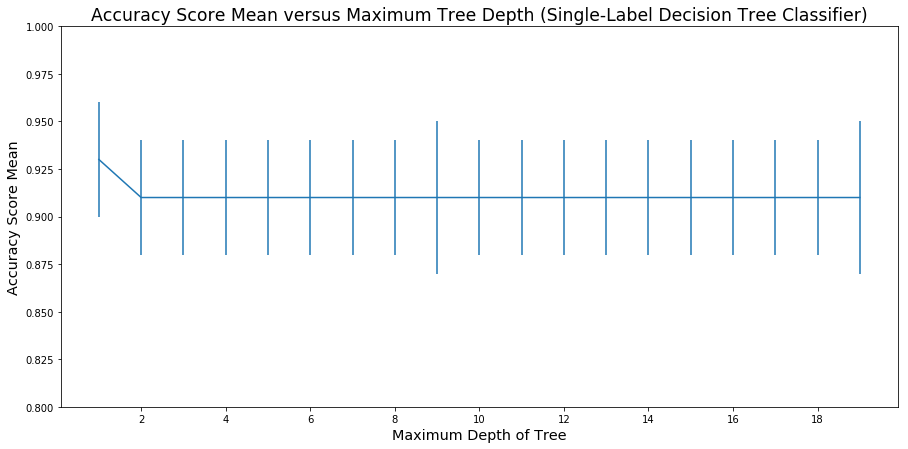

In [144]:
py.figure(figsize = (15,7))
py.errorbar(treeBool_df.index.tolist(),treeBool_df['Accuracy Score Mean'],yerr = treeBool_df['Accuracy Score StdDev'])
py.xlabel('Maximum Depth of Tree', fontsize = 'x-large')
py.ylabel('Accuracy Score Mean', fontsize = 'x-large')
py.ylim(0.8,1)
py.xticks([2,4,6,8,10,12,14,16,18])
py.title('Accuracy Score Mean versus Maximum Tree Depth (Single-Label Decision Tree Classifier)',
        fontsize = 'xx-large')

In [145]:
myTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
myTree.fit(X,IR_Ratings)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [146]:
y_hat = myTree.predict(X)
accuracy_score(IR_Ratings, y_hat)

0.8164251207729468

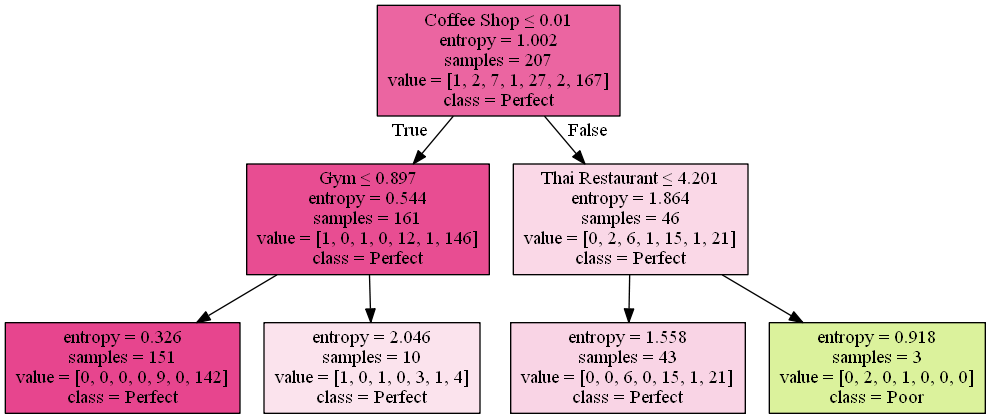

In [141]:
hold = StringIO()
features = venueCount_df.drop('Italian Restaurant', axis = 1).columns
classes = ['Very Poor', 'Poor', 'Okay', 'Good', 'Very Good', 'Excellent', 'Perfect']

out = tree.export_graphviz(myTree, feature_names = features, class_names = classes, out_file = hold, filled = True,
                   special_characters = True, rotate = False)

graph = pydotplus.graph_from_dot_data(hold.getvalue())
Image(graph.create_png())


In [7]:
boolTree = DecisionTreeClassifier(criterion = 'entropy', max_depth =2)
boolTree.fit(X, IR_Bool.astype(str))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

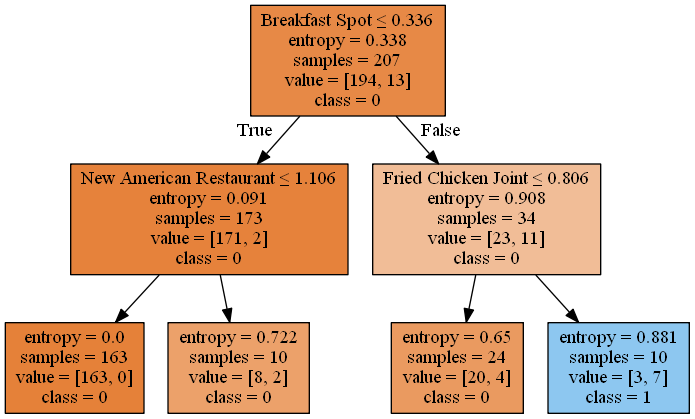

In [148]:
hold = StringIO()
features = venueCount_df.drop('Italian Restaurant', axis = 1).columns
bool_classes = ['0','1']

out = tree.export_graphviz(boolTree, feature_names = features, class_names = bool_classes, out_file = hold, filled = True,
                   special_characters = True, rotate = False)

graph = pydotplus.graph_from_dot_data(hold.getvalue())
Image(graph.create_png())


In [14]:
y_hat = boolTree.predict(X)
accuracy_score(IR_Bool.astype(str), y_hat)
y_hat

array(['1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [16]:
## C. Logistic Regression Classification

In [9]:
#Logistic Regression Validation of Regularization Strength, Multi-Label Approach


logVal_df = pd.DataFrame(columns = ['C Value','Accuracy Score Median','Accuracy Score Mean', 'Accuracy Score StdDev',
                                   'Accuracy Score Skew'])
logVal_dl = []

for k in [1,10,15,20,30,50,100,1000,2000]:
    loss_list = []
    testLog = LogisticRegression(C = k, solver = 'newton-cg', multi_class = 'ovr')
        X_train, X_test, y_train, y_test = train_test_split(X, IR_Ratings, test_size = 0.3, random_state = r)
        testLog.fit(X_train, y_train)
        y_hat = testLog.predict(X_test)
        accuracy = accuracy_score(y_test, y_hat)
        loss_list.append(accuracy)
    loss_mean = round(np.mean(loss_list),2)
    loss_median = round(np.median(loss_list),2)
    loss_std = round(np.std(loss_list, ddof = 19),2)
    loss_skew = round( ((loss_median - loss_mean)*3/loss_std),2 )
    logVal_dl.append({'C Value':k, 'Accuracy Score Median':loss_median,
                      'Accuracy Score Mean':loss_mean,'Accuracy Score StdDev':loss_std,
                     'Accuracy Score Skew':loss_skew})
    
logVal_df = logVal_df.append(logVal_dl, ignore_index = True)
logVal_df = logVal_df.set_index('C Value')
logVal_df




,Accuracy Score Median,Accuracy Score Mean,Accuracy Score StdDev,Accuracy Score Skew
C Value,,,,
1,0.79,0.79,0.19,0.0
10,0.78,0.78,0.20,0.0
15,0.78,0.78,0.22,0.0
20,0.77,0.77,0.22,0.0
30,0.77,0.77,0.23,0.0
50,0.77,0.77,0.23,0.0
100,0.77,0.77,0.24,0.0
1000,0.77,0.77,0.24,0.0
2000,0.77,0.77,0.23,0.0


Text(0.5, 1.0, 'Mean Accuracy Score versus C-Value (Multi-Label Logistic Regression)')

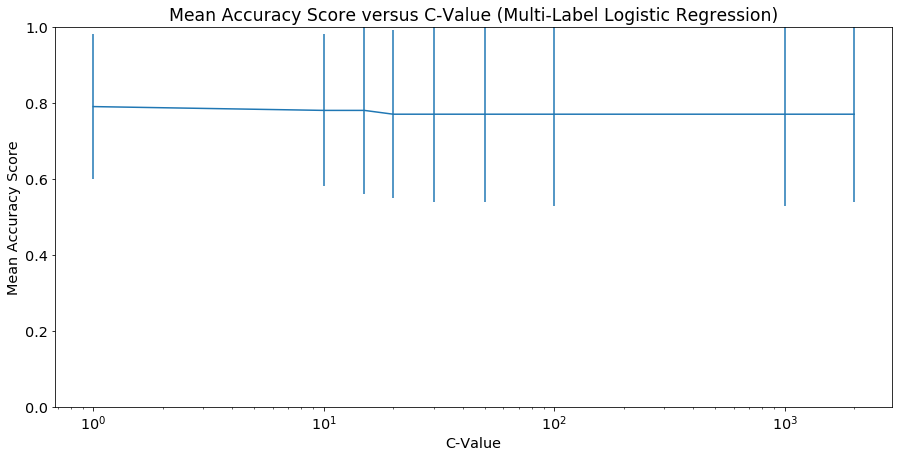

In [10]:
py.figure(figsize = (15,7))
py.errorbar(logVal_df.index.tolist(), logVal_df['Accuracy Score Mean'], yerr = logVal_df['Accuracy Score StdDev'])
py.xlabel('C-Value', fontsize = 'x-large')
py.ylabel('Mean Accuracy Score', fontsize = 'x-large')
py.ylim(0,1)
py.xscale('log')
py.xticks(fontsize = 'x-large')
py.yticks(fontsize = 'x-large')
py.title('Mean Accuracy Score versus C-Value (Multi-Label Logistic Regression)', fontsize = 'xx-large')


In [30]:
myLog = LogisticRegression(C = 1000, solver = 'newton-cg', multi_class = 'ovr')
X_train, X_test, y_train, y_test = train_test_split(X, IR_Ratings)

{'Excellent', 'Good', 'Okay', 'Perfect', 'Poor', 'Very Good', 'Very Poor'}

In [6]:
#Logistic Regression Validation of Regularization Strength, Single-Label Approach


logBool_df = pd.DataFrame(columns = ['C Value','Accuracy Score Mean','Accuracy Score StdDev',
                                   'Log Loss Mean', 'Log Loss StdDev'])
logBool_dl = []

for k in [1,10,15,20,30,50,100,1000,2000]:
    aL = []
    llL = []
    testLog = LogisticRegression(C = k, solver = 'liblinear', multi_class = 'ovr')
    for r in range(20):
        good_split = False
        while(good_split == False):
            X_train, X_test, y_train, y_test = train_test_split(X, IR_Bool, test_size = 0.3, random_state = r)
            if(set(y_train) == set(y_test)):
                good_split = True
                testLog.fit(X_train, y_train)
                y_hat = testLog.predict(X_test)
                y_p = testLog.predict_proba(X_test)
                acc = accuracy_score(y_test, y_hat)
                ll = log_loss(y_test, y_p)
                aL.append(acc)
                llL.append(ll)
            else:
                print('Retry')
    a_mean = round(np.mean(aL),2)
    a_std = round(np.std(aL, ddof = 19),2)
    ll_mean = round(np.mean(llL),2)
    ll_std = round(np.std(llL, ddof = 19),2)    


    logBool_dl.append({'C Value':k,
                       'Accuracy Score Mean':a_mean, 'Accuracy Score StdDev':a_std,
                       'Log Loss Mean':ll_mean,'Log Loss StdDev':ll_std,

                      })
    
logBool_df = logBool_df.append(logBool_dl, ignore_index = True)
logBool_df = logBool_df.set_index('C Value')
logBool_df

,Accuracy Score Mean,Accuracy Score StdDev,Log Loss Mean,Log Loss StdDev
C Value,,,,
1,0.78,0.19,2.21,2.67
10,0.78,0.19,3.04,3.60
15,0.78,0.19,3.17,3.74
20,0.78,0.19,3.25,3.84
30,0.78,0.19,3.37,3.98
50,0.78,0.19,3.51,4.14
100,0.78,0.19,3.68,4.32
1000,0.78,0.19,4.12,4.81
2000,0.78,0.19,4.23,4.93


Text(0.5, 1.0, 'Mean Accuracy Score versus C-Value (Single-Label Logistic Regression)')

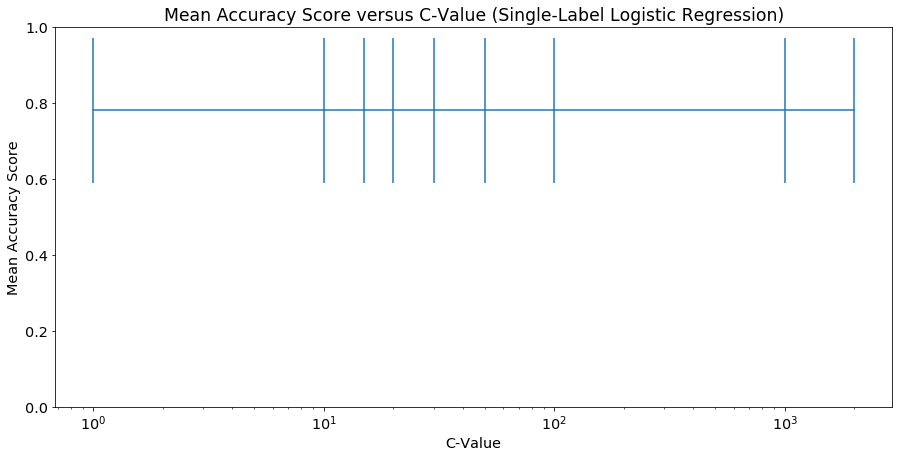

In [12]:
py.figure(figsize = (15,7))
py.errorbar(logBool_df.index.tolist(), logBool_df['Accuracy Score Mean'], yerr = logBool_df['Accuracy Score StdDev'])
py.xlabel('C-Value', fontsize = 'x-large')
py.ylabel('Mean Accuracy Score', fontsize = 'x-large')
py.ylim(0,1)
py.yticks(fontsize = 'x-large')
py.xticks(fontsize = 'x-large')
py.xscale('log')
py.title('Mean Accuracy Score versus C-Value (Single-Label Logistic Regression)', fontsize = 'xx-large')


Text(0.5, 1.0, 'Mean Log Loss versus C-Value (Single-Label Logistic Regression)')

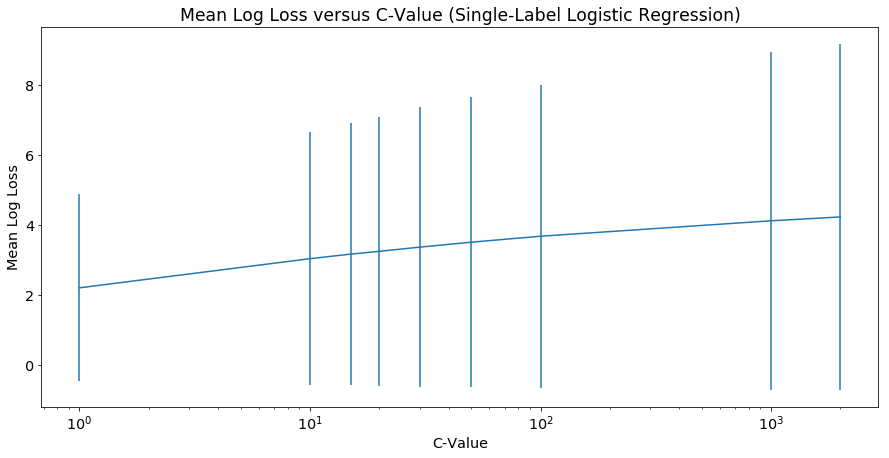

In [65]:
py.figure(figsize = (15,7))
py.errorbar(logBool_df.index.tolist(), logBool_df['Log Loss Mean'], yerr = logBool_df['Log Loss StdDev'])
py.xlabel('C-Value', fontsize = 'x-large')
py.ylabel('Mean Log Loss', fontsize = 'x-large')
py.yticks(fontsize = 'x-large')
py.xticks(fontsize = 'x-large')
py.xscale('log')
py.title('Mean Log Loss versus C-Value (Single-Label Logistic Regression)', fontsize = 'xx-large')


In [60]:
myLog = LogisticRegression(C = 1000, solver = 'liblinear', multi_class = 'ovr')
myLog.fit(X, IR_Bool)
y_hat = myLog.predict(X)
print(log_loss(IR_Bool, y_hat))

9.992007221626413e-16


# IV. Describe Characteristics of Neighborhoods

In [15]:
venueCount_df.corr()['Italian Restaurant'].sort_values(ascending = False)

Italian Restaurant               1.000000
Grocery Store                    0.546016
Pub                              0.544983
Breakfast Spot                   0.542681
Sporting Goods Shop              0.535533
Bakery                           0.528232
Supermarket                      0.508174
Indie Movie Theater              0.491686
Gym / Fitness Center             0.475774
Bagel Shop                       0.462704
Ice Cream Shop                   0.453357
Gym                              0.441229
Farmers Market                   0.439721
Gymnastics Gym                   0.434499
Irish Pub                        0.434499
Thai Restaurant                  0.429581
French Restaurant                0.415920
Burger Joint                     0.406983
Playground                       0.402804
Liquor Store                     0.398869
Pizza Place                      0.392018
Warehouse Store                  0.391274
Paper / Office Supplies Store    0.389750
Plaza                            0

(0.4, 0.6)

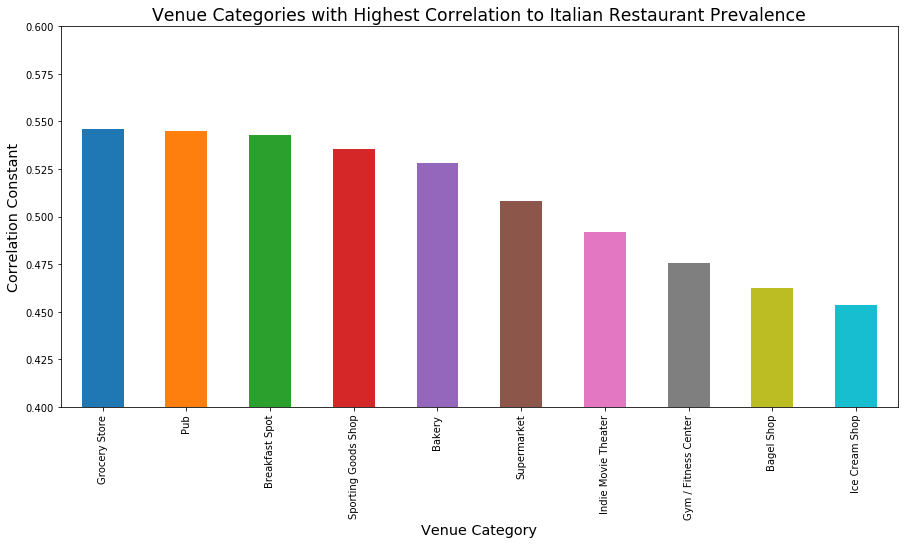

In [14]:
fig = py.figure(figsize = (15,7))
axCorr = venueCount_df.corr()['Italian Restaurant'].sort_values(ascending = False)[1:11].plot(kind = 'bar')
axCorr.set_title('Venue Categories with Highest Correlation to Italian Restaurant Prevalence',
                fontsize = 'xx-large')
axCorr.set_ylabel('Correlation Constant', fontsize = 'x-large')
axCorr.set_xlabel('Venue Category', fontsize = 'x-large')
axCorr.set_ylim(0.4,0.6)

In [47]:

fra = venueCount_df.loc[(venueCount_df['Italian Restaurant'] > 3),:].transpose()
outDf = pd.DataFrame(columns = fra.columns)


for neighborhood in fra1.columns:
    ser = pd.Series(index = fra.index, data = fra[neighborhood]).sort_values(ascending = False)
    tuL = []
    for i in range(5):
        tup = (ser.index[i],ser.values[i])
        tuL.append(tup)

    outDf.loc[:,neighborhood] = tuL

outDf.index = ['1st Category, Count',
               '2nd Category, Count',
               '3rd Category, Count',
               '4th Category, Count',
               '5th Category, Count']
outDf

Neighborhood,The Island,Edison Park,DOuglas Park,Big Oaks
"1st Category, Count","(Hotel, 5)","(Grocery Store, 7)","(Italian Restaurant, 4)","(Italian Restaurant, 5)"
"2nd Category, Count","(Italian Restaurant, 4)","(Italian Restaurant, 6)","(Breakfast Spot, 2)","(Sandwich Place, 5)"
"3rd Category, Count","(Donut Shop, 3)","(Coffee Shop, 4)","(Bakery, 2)","(Pizza Place, 4)"
"4th Category, Count","(Steakhouse, 2)","(Pizza Place, 4)","(Mexican Restaurant, 1)","(Supermarket, 3)"
"5th Category, Count","(Seafood Restaurant, 2)","(Mexican Restaurant, 3)","(Playground, 1)","(Pharmacy, 3)"


In [34]:
cgroups = venueCount_df.copy()
cgroups = venueCount_df.groupby(IR_Ratings)

Text(0, 0.5, 'Average Number of Venues')

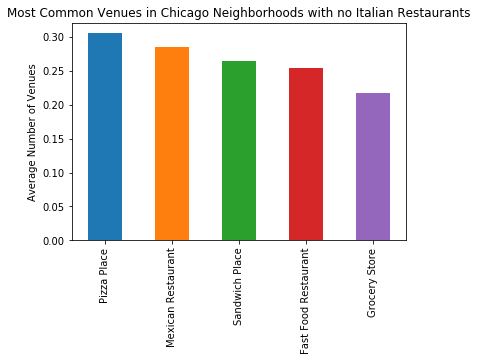

In [56]:
ax = cgroups.get_group('Very Poor').mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with no Italian Restaurants')
ax.set_ylabel('Average Number of Venues')

Text(0, 0.5, 'Average Number of Venues')

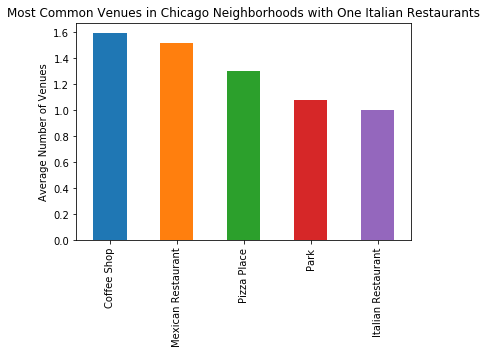

In [57]:
ax = cgroups.get_group('Poor').mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with One Italian Restaurants')
ax.set_ylabel('Average Number of Venues')

Text(0, 0.5, 'Average Number of Venues')

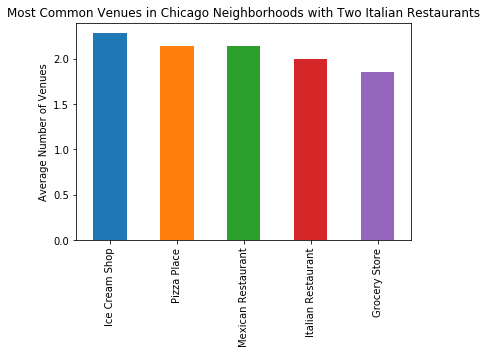

In [58]:
ax = cgroups.get_group('Okay').mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with Two Italian Restaurants')
ax.set_ylabel('Average Number of Venues')

Text(0, 0.5, 'Average Number of Venues')

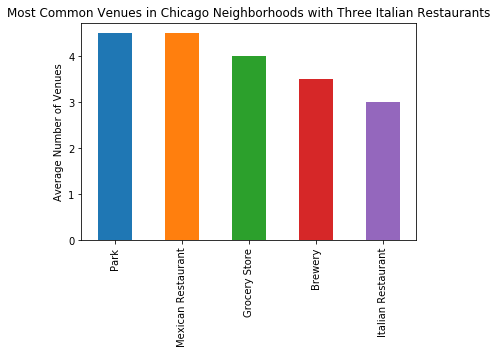

In [59]:
ax = cgroups.get_group('Good').mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with Three Italian Restaurants')
ax.set_ylabel('Average Number of Venues')

Text(0, 0.5, 'Average Number of Venues')

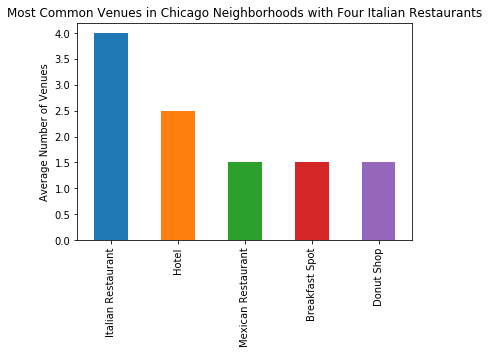

In [60]:
ax = cgroups.get_group('Very Good').mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with Four Italian Restaurants')
ax.set_ylabel('Average Number of Venues')

Text(0, 0.5, 'Average Number of Venues')

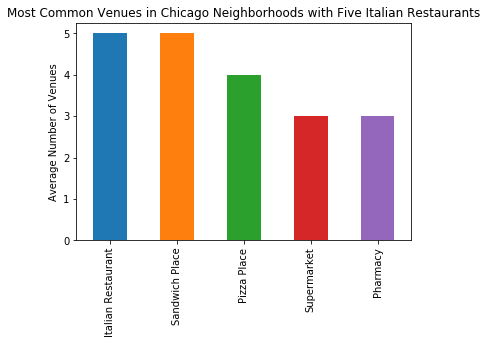

In [61]:
ax = cgroups.get_group('Excellent').mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with Five Italian Restaurants')
ax.set_ylabel('Average Number of Venues')

Text(0, 0.5, 'Average Number of Venues')

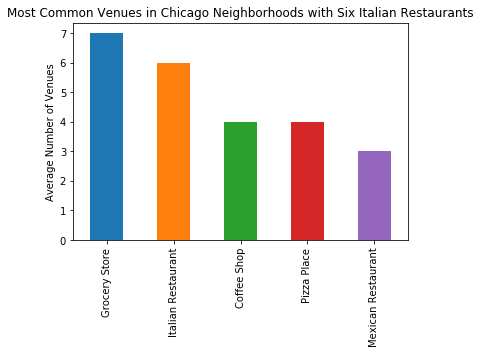

In [62]:
ax = cgroups.get_group('Perfect').mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with Six Italian Restaurants')
ax.set_ylabel('Average Number of Venues')

In [16]:
bgroups = venueCount_df.groupby(IR_Bool)

Text(0.5, 0, 'Venue Category')

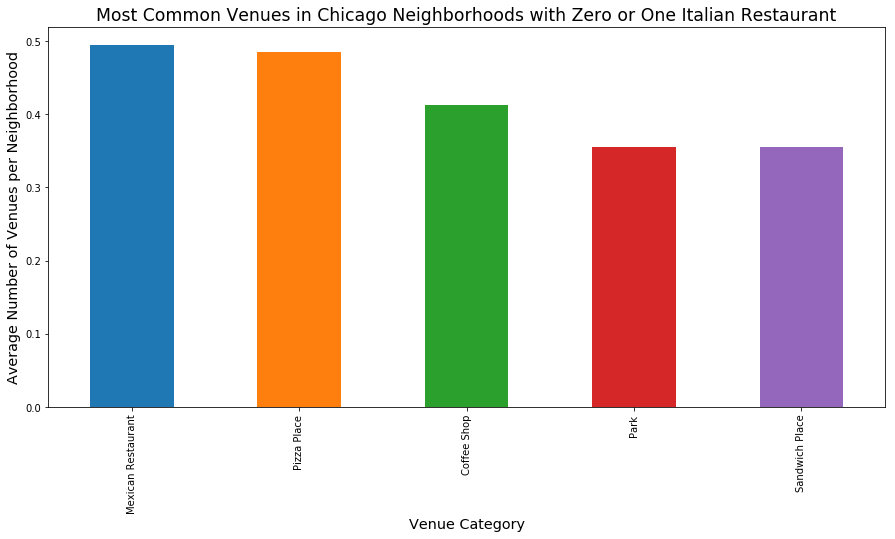

In [18]:
fig = py.figure(figsize = (15,7))
ax = bgroups.get_group(0).mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with Zero or One Italian Restaurant', fontsize = 'xx-large')
ax.set_ylabel('Average Number of Venues per Neighborhood', fontsize = 'x-large')
ax.set_xlabel('Venue Category', fontsize = 'x-large')

Text(0.5, 0, 'Venue Categories')

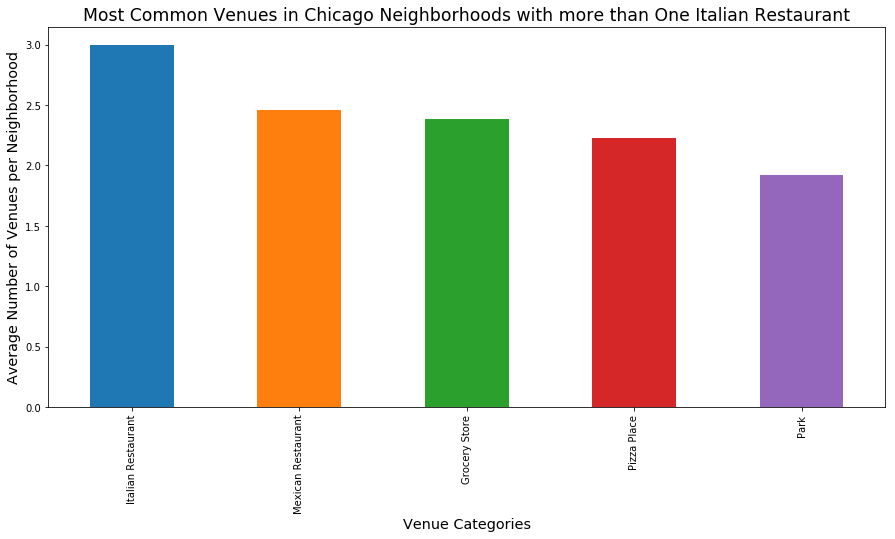

In [53]:
fig = py.figure(figsize = (15,7))
ax = bgroups.get_group(1).mean(axis = 0).sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_title('Most Common Venues in Chicago Neighborhoods with more than One Italian Restaurant', fontsize = 'xx-large')
ax.set_ylabel('Average Number of Venues per Neighborhood', fontsize = 'x-large')
ax.set_xlabel('Venue Categories', fontsize = 'x-large')

In [19]:
s0 = bgroups.get_group(0).mean(axis = 0)
s1 = bgroups.get_group(1).mean(axis = 0)
dif = s1 - s0
dif2 = dif.sort_values(ascending = False)[1:6]
dif2

Grocery Store         2.049564
Mexican Restaurant    1.966693
Ice Cream Shop        1.763283
Pizza Place           1.746233
Park                  1.567407
dtype: float64

In [19]:
s1['Grocery Store']

NameError: name 's1' is not defined

Text(0, 0.5, 'Group 1 Prevalance minus Group 0 Prevalence')

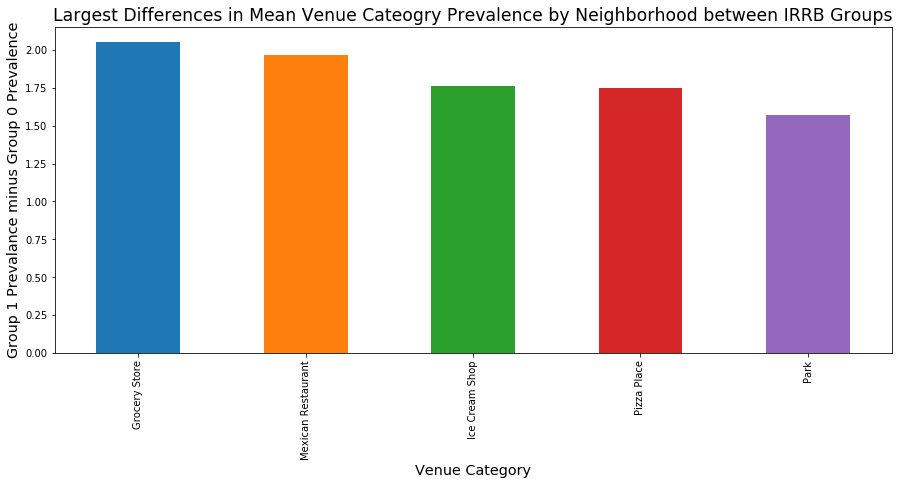

In [21]:
fig = py.figure(figsize = (15,6))
ax = dif2.plot(kind = 'bar')
ax.set_title('Largest Differences in Mean Venue Cateogry Prevalence by Neighborhood between IRRB Groups',
            fontsize = 'xx-large')
ax.set_xlabel('Venue Category', fontsize = 'x-large')
ax.set_ylabel('Group 1 Prevalance minus Group 0 Prevalence', fontsize = 'x-large')

In [11]:
venueCount_df.corr()['Italian Restaurant'].sort_values(ascending = False).head()

Italian Restaurant     1.000000
Grocery Store          0.554403
Breakfast Spot         0.549981
Pub                    0.549094
Sporting Goods Shop    0.538088
Name: Italian Restaurant, dtype: float64

# IV. Mapping

In [22]:
chicago_df = chicago_df.set_index('Neighborhood', drop = True)

KeyError: 'Neighborhood'

In [23]:
center_latitude = v_df['Latitude'].mean()
center_longitude = v_df['Longitude'].mean()

myMap = folium.Map(location = [center_latitude, center_longitude], zoom_start = 10)

for neighborhood in chicago_df.index:
    dist = chicago_df.loc[neighborhood,'District']
    lat = chicago_df.loc[neighborhood,'Latitude']
    long = chicago_df.loc[neighborhood,'Longitude']
    rating = IR_Ratings[neighborhood]
    
    label = '{}, {}: {} Italian Restaurant Rating'.format(neighborhood, dist, rating)
    label = folium.Popup(label, parse_html = True)
    if(rating == 'Very Poor'):
        r_c = 'red'
    elif(rating == 'Poor'):
        r_c = 'orange'
    elif(rating == 'Okay'):
        r_c = 'yellow'
    elif(rating == 'Good'):
        r_c = 'green'
    elif(rating == 'Very Good'):
        r_c = 'cyan'
    elif(rating == 'Excellent'):
        r_c = 'blue'
    elif(rating == 'Perfect'):
        r_c = 'violet'
    
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        popup = label,
        color = r_c,
        fill = True,
        fill_color = r_c,
        fill_opacity = 0.7,
        parse_html = False
    ).add_to(myMap)
myMap    

In [24]:
center_latitude = v_df['Latitude'].mean()
center_longitude = v_df['Longitude'].mean()

myBoolMap = folium.Map(location = [center_latitude, center_longitude], zoom_start = 10)

for neighborhood in chicago_df.index:
    dist = chicago_df.loc[neighborhood,'District']
    lat = chicago_df.loc[neighborhood,'Latitude']
    long = chicago_df.loc[neighborhood,'Longitude']
    rating = IR_Bool[neighborhood]
    

    if(rating == 0):
        r_c = 'red'
        ratString = 'Bad'
    elif(rating == 1):
        r_c = 'green'
        ratString = 'Good'
    else:
        r_c = 'yellow'   
    label = '{},{}. Italian Restaurant Rating: {}'.format(neighborhood, dist, ratString)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        popup = label,
        color = r_c,
        fill = True,
        fill_color = r_c,
        fill_opacity = 0.5,
        parse_html = False
    ).add_to(myBoolMap)

myBoolMap    

In [108]:
tup = []
for neighborhood in chicago_df.index:
    tup.append((chicago_df.loc[neighborhood,'Latitude'], chicago_df.loc[neighborhood, 'Longitude']) )
    
test = pd.Series(index = chicago_df.index, data = tup)
len(list(set(tup)))

207

In [116]:
coordTupSet = set()
for neighborhood in chicago_df.index:
    coordTup = (chicago_df.loc[neighborhood,'Latitude'],chicago_df.loc[neighborhood,'Longitude'])
    if(not(coordTup in coordTupSet)):
        coordTupSet.add(coordTup)
    else:
        chicago_df = chicago_df.drop(neighborhood, axis = 0)
chicago_df_raw = chicago_df.reset_index()